First, load the data,in this notebook we are using the rhizo data from Ashley's github

In [1]:
import sys
sys.path.append('../Code')
import loadData 
import RunML
import RunML_continue
import FS
import metric

import pandas as pd
import numpy as np
import random
import time

### read the 3 files

In [2]:
metadata = pd.read_csv('../../Bigdatafolder/rhizo_files/ITS_rhizosphere_metadata.csv')

In [3]:
print(metadata)

        Unnamed: 0      habitat irrigation drought_tolerance marker_gene
0      1016-1-14-3  rhizosphere       full              HI30         ITS
1     1016-2-16-75  rhizosphere       full              HI30         ITS
2      1016-3-6-42  rhizosphere    reduced              HI30         ITS
3     1016-4-21-30  rhizosphere    reduced              HI30         ITS
4     1024-1-12-41  rhizosphere       full              LO30         ITS
..             ...          ...        ...               ...         ...
57  GW9953-4-27-30  rhizosphere    reduced              LO30         ITS
58    GW9964-1-4-3  rhizosphere       full              LO30         ITS
59   GW9964-2-6-50  rhizosphere       full              LO30         ITS
60  GW9964-3-10-16  rhizosphere    reduced              LO30         ITS
61  GW9964-4-25-10  rhizosphere    reduced              LO30         ITS

[62 rows x 5 columns]


In [4]:
metadata.shape

(62, 5)

In [5]:
metadata['drought_tolerance'].value_counts()

drought_tolerance
LO30    32
HI30    30
Name: count, dtype: int64

In [6]:
metadata['marker_gene'].value_counts()

marker_gene
ITS    62
Name: count, dtype: int64

In [7]:
label1 = metadata['drought_tolerance']

In [8]:
#label2 = metadata['marker_gene']

In [9]:
rhizosphere_otu0 = pd.read_csv('../../Bigdatafolder/rhizo_files/ITS_rhizosphere_otu.csv',index_col=0)

In [10]:
rhizosphere_otu0.shape

(13819, 62)

In [11]:
rhizosphere_otu = rhizosphere_otu0.T

In [12]:
ASV = list(rhizosphere_otu.columns)

In [13]:
len(ASV)

13819

In [14]:
data = rhizosphere_otu

In [15]:
data

,0008d8b083042ca29ace558fe3840fed,00133e612bfa794a439e34b9a0f99988,0016380ec7ace7724205c9fc70fb30df,00198b9ed63c841bf4130f614b4e044a,0019ce0de0bbd3440437e1071cd9d544,001a89a493296be0654aa917509df3ba,001f18c0622ce51cf92493625ad39367,0020feffc2bf42443932f9a4a0d47f0e,0026469361e47a05a740352addf8a88f,0026ec499d1c31acbd890c491702a5f4,...,ffda3d36107a9f801596168986eb370f,ffde533ac801381a7e869f58f5937131,ffe529f646d4d1a7b6fca0cb0c18d7c9,ffe60ef2c7d147036972d61c31a37b05,ffec72a1d4dc42cdcb5f56e7d30b772f,ffecb85b19087104f570b3412d180618,fff56abcade2e6ca7307e0800f650f3d,fff74169503bab880be5f31c8439eafd,fffa8a90cf4567803b2d3a4fcb2881a1,fffb5f9b6f3273aa47f0e90fb70778ce
1016-1-14-3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1016-2-16-75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1016-3-6-42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1016-4-21-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1024-1-12-41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GW9953-4-27-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GW9964-1-4-3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GW9964-2-6-50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GW9964-3-10-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# 1. abundance matrix--> relative abundance matrix
data=FS.relative_abundance(data)
print(np.shape(data))

(62, 13819)


Perform multiLabel feature selection, this is done by calculating Kruskal-Wallis H-test on each OTU for each environmental factor, each OTU/ASV is given a weighted h score.

In [17]:
y=label1

In [18]:
# 2. calculating H score for each OTU
weights=FS.OTU_H_Score_fun(data,y)

In [19]:
print(min(weights));print(max(weights))

0.0
5.3831280750307435


In [20]:
# 3. determine the elbowpoint and the select indices of the features
selectedOTU_index, eps=FS.indice_H_unisig(weights,y)

This plot shows that the gain in information decreases as we include more OTUs along the ranks. 

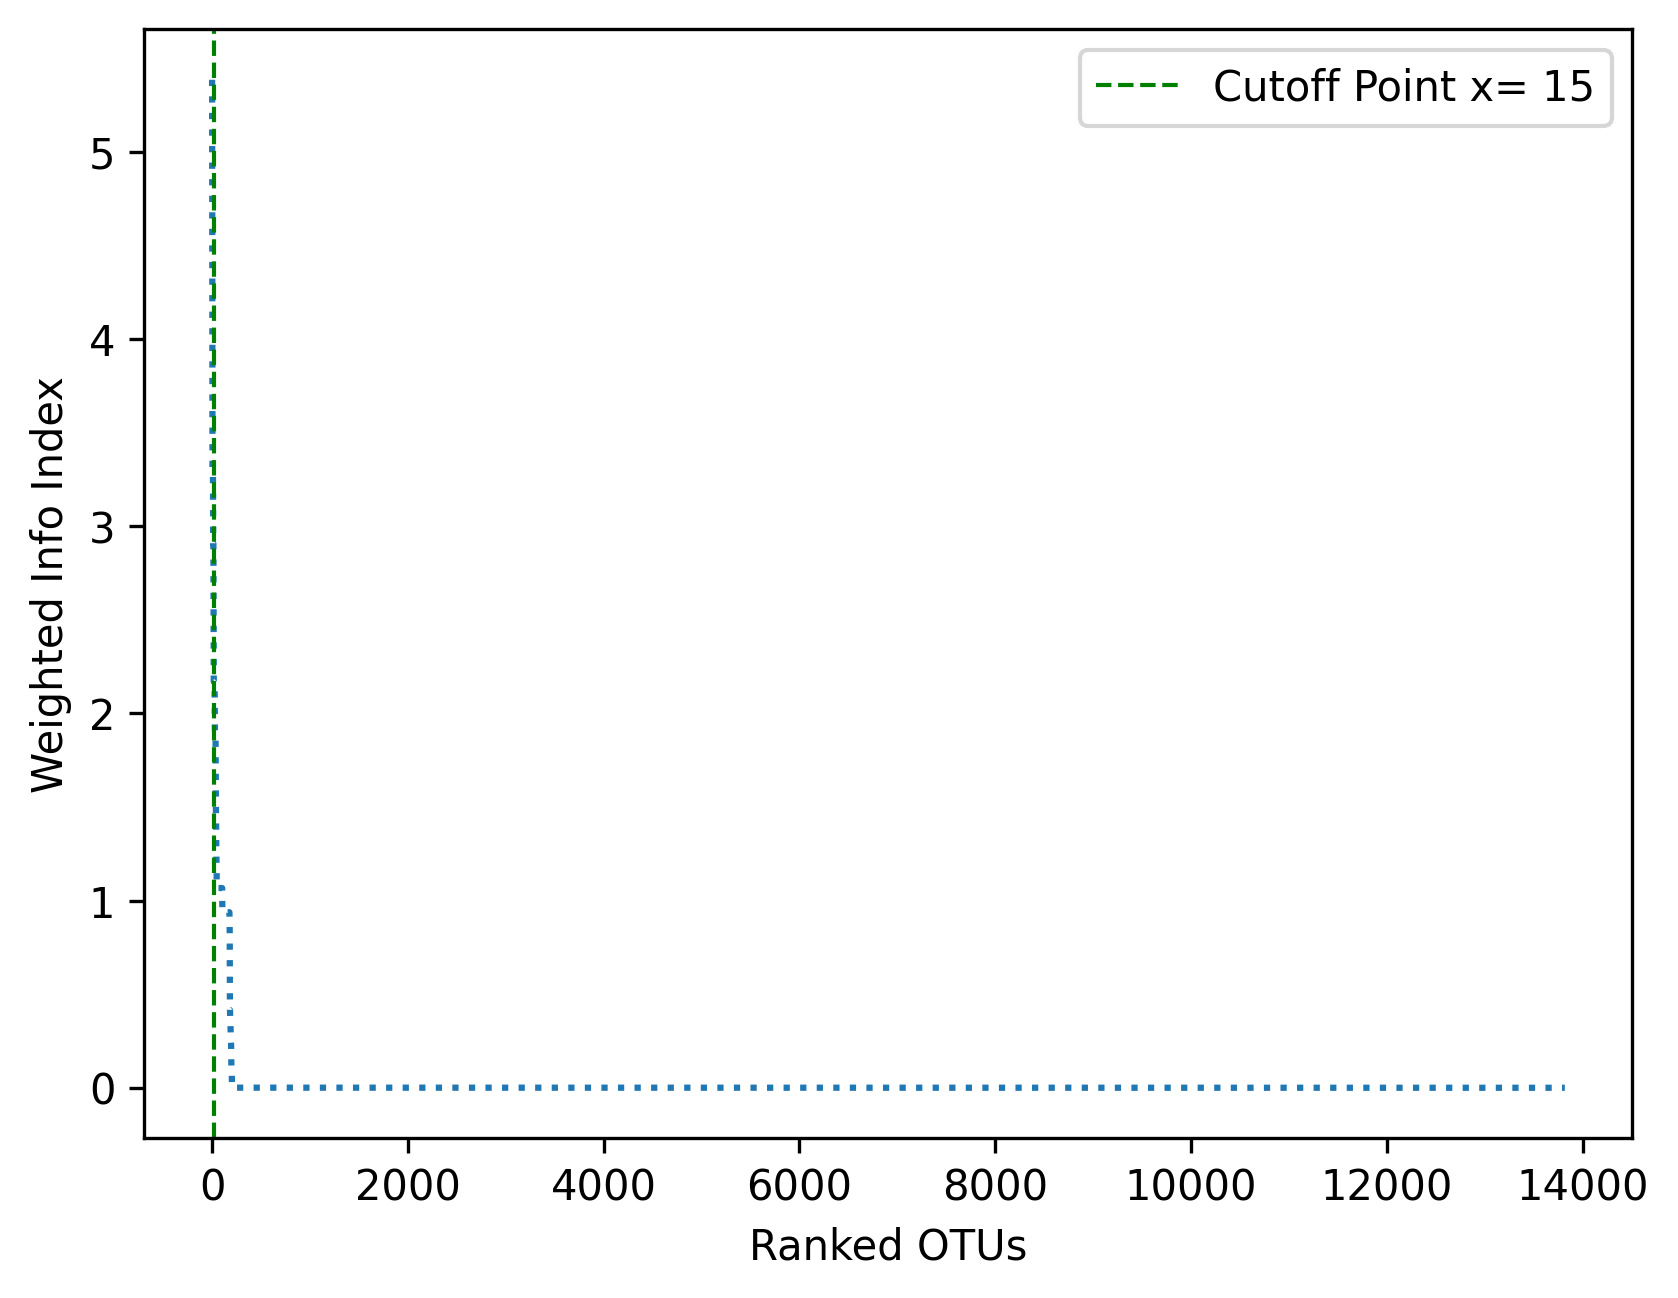

In [21]:
#plot the h statistics and cutoff descendingly
FS.plotWeightedIndex(weights,threshold=eps)

In [22]:
X_FS = data[:,selectedOTU_index]

In [23]:
iter =30
cls = ["RF","SVM"]


In [24]:
targetLabel = label1
X_lasso,_ = RunML_continue.LassoFeatureSelection(data,targetLabel)# this is depend on the target variable(do not update here)

data_subset = {"AllFeatures":data, 
               "SelectMicro": X_FS,
               "Lasso":X_lasso,
               "Random":data
              }

print(np.shape(data))
print(np.shape(X_FS))
print(np.shape(X_lasso))


(62, 13819)
(62, 15)
(62, 45)


In [25]:
start_time = time.time()
# the result of 5-fold cross validation
dict_cm = RunML_continue.runClassifier_FScompare(data_subsets= data_subset,y= targetLabel,N=iter,classifiers=cls)
end_time = time.time()
print(f"It took {end_time - start_time:.2f} seconds")

             RF_Accuracy    RF_AUC  SVM_Accuracy   SVM_AUC
AllFeatures     0.485897  0.540476      0.551282  0.329762
SelectMicro     0.679487  0.692460      0.569231  0.339286
Lasso           0.806410  0.939286      0.515385  0.296032
Random          0.474744  0.468823      0.498419  0.519167
It took 141.88 seconds


In [26]:
import pickle

# Save dictionary to a pickle file
with open('../results/dict_cm_rhizo.pkl', 'wb') as pickle_file:
    pickle.dump(dict_cm, pickle_file)

In [27]:
import pickle
# Load dictionary from the pickle file
with open('../results/dict_cm_rhizo.pkl', 'rb') as pickle_file:
    data_loaded = pickle.load(pickle_file)

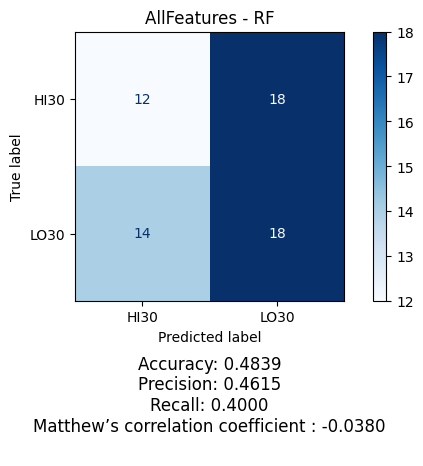

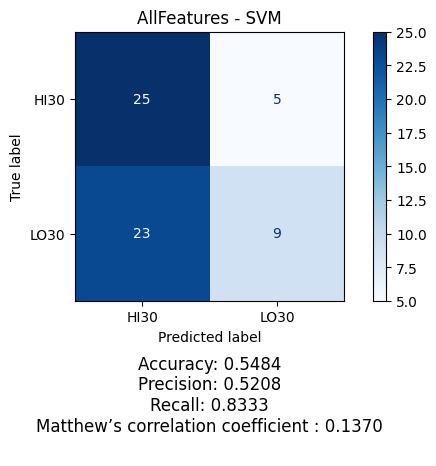

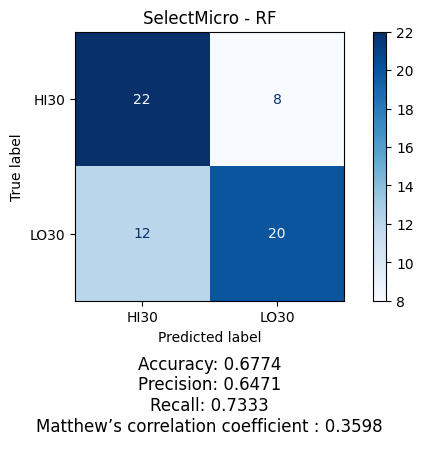

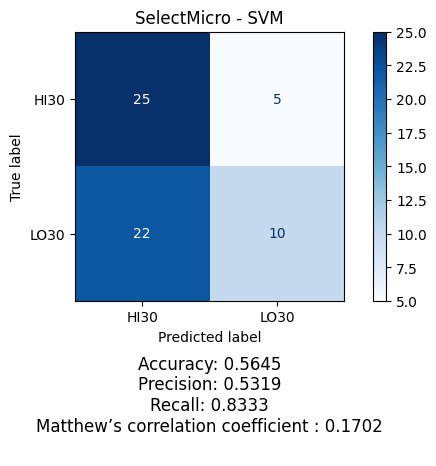

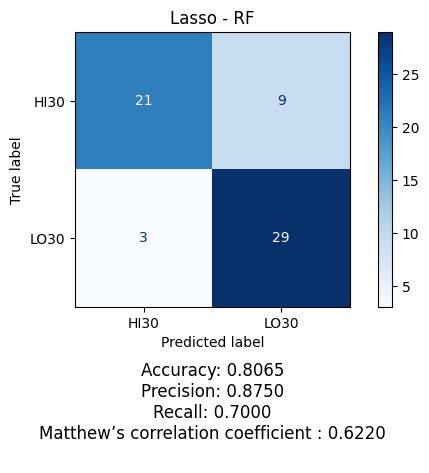

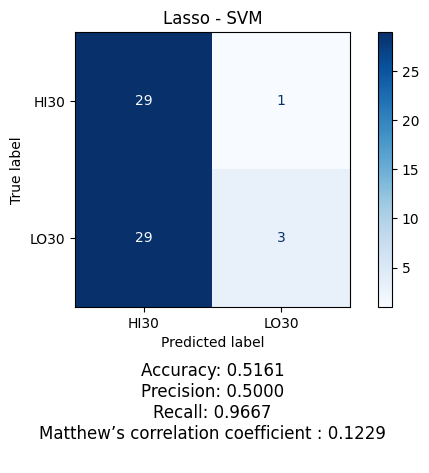

In [28]:
for dataset_name, classifiers in data_loaded.items():
        for classifier_name, labels in classifiers.items():
            actual_labels = labels[0]
            predicted_labels = labels[1]
            metric.plot_confusion_matrices(actual_labels, predicted_labels,f"{dataset_name} - {classifier_name}",pos_y='HI30')

In [29]:
# Initialize a dictionary to hold AUC scores
auc_scores = {}
for name, clf in clfs.items():
    auc = RunML.CFValidation_AUCstatistic(data,targetLabel,classifier= clf)
    auc_scores[name] = auc
print("AllFeatures",auc_scores)

NameError: name 'clfs' is not defined

In [ ]:
auc_scores = {}
for name, clf in clfs.items():
    auc = RunML.CFValidation_AUCstatistic(X_FS,targetLabel,classifier= clf )
    auc_scores[name] = auc
print("SelectMicro",auc_scores)

In [ ]:
auc_list  = []
for ii in range(3):
    auc_scores = {}
    randomFeatures=random.sample(list(range(np.shape(data)[1])), topFeature_selected)
    X_randomFeatures=np.array(data)[:,randomFeatures]
    for name, clf in clfs.items():
        auc = RunML.CFValidation_AUCstatistic(X_randomFeatures,targetLabel,classifier= clf )
        auc_scores[name] = auc
    auc_list.append(auc_scores)
auc_pd = pd.DataFrame(auc_list)


In [ ]:
print("Random Selection",auc_pd.mean())

In [ ]:
X_Lasso=RunML.LassoFeatureSelection(data,targetLabel)

In [ ]:
len(X_Lasso)

In [ ]:
print(X_Lasso)

In [ ]:
auc_scores = {}
for name, clf in clfs.items():
    auc = RunML.CFValidation_AUCstatistic(X_Lasso,targetLabel,classifier= clf )
    auc_scores[name] = auc
print("SelectMicro",auc_scores)# this should be Lasso

In [ ]:
auc_list  = []
for ii in range(3):
    auc_scores = {}
    X_Lasso=RunML.LassoFeatureSelection(data,targetLabel)
    for name, clf in clfs.items():
        auc = RunML.CFValidation_AUCstatistic(X_Lasso,targetLabel,classifier= clf )
        auc_scores[name] = auc
    auc_list.append(auc_scores)
auc_pd = pd.DataFrame(auc_list)



In [ ]:
print("LASSO Selection",auc_pd.mean())


In [ ]:
y_a1 = data_loaded['SelectMicro']['SVM'][0]

In [ ]:
y_a2 = data_loaded['SelectMicro']['SVM'][1]

In [ ]:
print(y_a1)

In [ ]:
print(y_a2)

## compare the first 15 index

In [ ]:

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

entries=15
selectedOTU_index_15=selectedOTU_index[:entries]
X_FS_15=data[:,selectedOTU_index_15]

df=pd.DataFrame(data=X_FS_15)
selectedASVs=[ASV[i] for i in selectedOTU_index_15]

print(set(targetLabel))


In [ ]:
RunML.plotPresenseRatio(X_FS_15,targetLabel,selectedASVs,posLabel="LO30",posText="Low",negText="High",entries=entries)
